In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# This function adjusts the learning rate based on the current epoch.
# It keeps the initial learning rate for the first 5 epochs and then exponentially decays it.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),#Normalize the activations of the previous layer at each batch.
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'), # Fully connected layer with 64 units and ReLU activation.
    layers.Dense(10) # Fully connected output layer with 10 units (corresponding to 10 classes in CIFAR-10).

])

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

In [ ]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_scheduler_callback])


Epoch 1/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.1786 - accuracy: 0.5810 - val_loss: 1.2546 - val_accuracy: 0.5450 - lr: 0.0010
Epoch 2/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.0183 - accuracy: 0.6390 - val_loss: 1.0943 - val_accuracy: 0.6192 - lr: 0.0010
Epoch 3/5
1563/1563 [==============================] - 96s 61ms/step - loss: 0.9174 - accuracy: 0.6747 - val_loss: 1.0285 - val_accuracy: 0.6402 - lr: 0.0010
Epoch 4/5
1563/1563 [==============================] - 91s 58ms/step - loss: 0.8523 - accuracy: 0.6980 - val_loss: 0.8259 - val_accuracy: 0.7088 - lr: 0.0010
Epoch 5/5
1563/1563 [==============================] - 90s 57ms/step - loss: 0.8011 - accuracy: 0.7172 - val_loss: 1.2110 - val_accuracy: 0.6104 - lr: 0.0010


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 5s 17ms/step - loss: 1.2110 - accuracy: 0.6104
Test accuracy: 0.6104


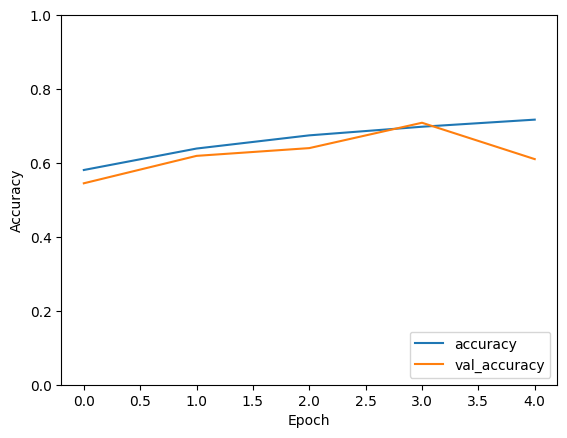

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()